# **Pride and Joy**
### *An investigation of mental health correlates in LGBQ+ people*
| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|Emily K. Sanders| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |Capstone Project|
|DSB-318| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |June 13, 2024|
---

## Prior Notebooks Summary

In the previous notebook, I 

In this notebook, I will ____________, including `python` code.

## Table of Contents

- [Exploratory Data Analyses](##Exploratory-Data-Analyses)
  - [Imports](###Imports)
  - [Summary Statistics](###Summary-Statistics)
  - [Correlations](###Correlations)
  - [Selected Graphs](###Selected-Graphs)
- [Notebook Summary](##Notebook-Summary)  

## Exploratory Data Analysis

### Imports

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from emilys_functions import my_date, autoplots
from warnings import simplefilter

In [2]:
# Settings preferences
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None 
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
# Thanks to daydaybroskii and KingOtto at Stack Overflow for that one
# https://stackoverflow.com/questions/68292862/performancewarning-dataframe-is-highly-fragmented-this-is-usually-the-result-o
plt.rcParams.update({'figure.max_open_warning': 0})
# Thanks to Luan Nico at Stack Overflow for that one
# https://stackoverflow.com/questions/27476642/matplotlib-get-rid-of-max-open-warning-output

In [3]:
# Import the dataframe from the previous notebook
meyer = pd.read_csv('../02_data/df_after_data_preparation_part_2.csv')
meyer.shape

(1494, 131)

### Summary Statistics

In [4]:
meyer.describe()

,studyid,w1kessler6_i,abus_treat_non_queer,abus_treat_sex_gender,abusive_treatment,bad_neighbhd,childhd_bullying_non_queer,childhd_bullying_sex_gender,chronic_strain,cohort,...,w1socsupport_fam_i,w1socsupport_fr_i,w1socsupport_i,w1socsupport_so_i,w1survey_yr,w1weight_full,waveparticipated,work_disc_non_queer,work_disc_sex_gender,work_neg_outcomes
count,1.494000e+03,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,...,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,1.590061e+08,7.666667,0.635207,0.392236,5.788487,1.342704,0.997323,0.406292,6.836011,1.870147,...,4.702477,5.407296,5.201807,5.495649,2016.281124,0.991618,2.526104,0.326640,0.139224,1.227577
std,5.726143e+06,5.469394,0.934631,0.605926,4.863244,1.553799,1.033268,0.604948,3.922459,0.859449,...,1.663379,1.447313,1.298235,1.680723,0.489630,0.740316,1.328870,0.733195,0.406776,1.602623
min,1.513398e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2016.000000,0.274022,1.000000,0.000000,0.000000,0.000000
25%,1.547582e+08,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,1.000000,...,3.562500,4.750000,4.500000,4.750000,2016.000000,0.477509,1.000000,0.000000,0.000000,0.000000
50%,1.570744e+08,7.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,6.000000,2.000000,...,5.000000,5.750000,5.416667,6.000000,2016.000000,0.695084,2.000000,0.000000,0.000000,1.000000
75%,1.628398e+08,12.000000,1.000000,1.000000,9.000000,3.000000,2.000000,1.000000,9.000000,3.000000,...,6.000000,6.500000,6.166667,7.000000,2017.000000,1.293305,4.000000,0.000000,0.000000,2.000000
max,1.766200e+08,24.000000,6.000000,3.000000,18.000000,4.000000,6.000000,2.000000,22.000000,3.000000,...,7.000000,7.000000,7.000000,7.000000,2018.000000,3.332937,4.000000,6.000000,3.000000,6.000000


### Correlations

In [5]:
meyer_corr = meyer.corr()

# When dealing with large datasets, I find it easier to view the correlation matrix in a CSV
meyer_corr.to_csv('../02_data/meyer_corr.csv', index = True)

# For those who prefer to view it in-text
meyer_corr

,studyid,w1kessler6_i,abus_treat_non_queer,abus_treat_sex_gender,abusive_treatment,bad_neighbhd,childhd_bullying_non_queer,childhd_bullying_sex_gender,chronic_strain,cohort,...,w1socsupport_fam_i,w1socsupport_fr_i,w1socsupport_i,w1socsupport_so_i,w1survey_yr,w1weight_full,waveparticipated,work_disc_non_queer,work_disc_sex_gender,work_neg_outcomes
studyid,1.000000,0.103906,0.070119,0.009527,0.000728,0.016558,0.049385,0.027719,0.074053,-0.104267,...,-0.029786,-0.038420,-0.039249,-0.028389,0.855644,0.021940,-0.354735,0.023757,0.021003,0.024897
w1kessler6_i,0.103906,1.000000,0.216893,0.150637,0.221233,0.195985,0.285710,0.182663,0.525705,-0.367859,...,-0.233671,-0.210511,-0.246074,-0.157687,0.097543,0.288530,-0.146066,0.145423,0.103663,0.110214
abus_treat_non_queer,0.070119,0.216893,1.000000,0.379378,0.281561,0.103208,0.399175,0.230326,0.268685,-0.110708,...,-0.112835,-0.073170,-0.100014,-0.057081,0.080811,0.106148,-0.106925,0.376324,0.218240,0.179774
abus_treat_sex_gender,0.009527,0.150637,0.379378,1.000000,0.306612,0.146677,0.227409,0.398186,0.156152,-0.089912,...,-0.102275,-0.047296,-0.063868,-0.006051,0.036711,0.073047,-0.026034,0.205929,0.343529,0.121147
abusive_treatment,0.000728,0.221233,0.281561,0.306612,1.000000,0.125892,0.213420,0.179944,0.306359,0.146622,...,-0.203500,-0.083530,-0.142658,-0.057248,0.001079,-0.001988,-0.073352,0.272789,0.227523,0.345633
bad_neighbhd,0.016558,0.195985,0.103208,0.146677,0.125892,1.000000,0.124060,0.101170,0.235176,-0.107593,...,-0.157673,-0.139102,-0.156306,-0.086375,0.009741,0.088249,-0.050074,0.138611,0.076000,0.087816
childhd_bullying_non_queer,0.049385,0.285710,0.399175,0.227409,0.213420,0.124060,1.000000,0.347850,0.328925,-0.191213,...,-0.131307,-0.101276,-0.125258,-0.073094,0.037234,0.170819,-0.062388,0.313247,0.147496,0.165396
childhd_bullying_sex_gender,0.027719,0.182663,0.230326,0.398186,0.179944,0.101170,0.347850,1.000000,0.172902,-0.123904,...,-0.064002,-0.030966,-0.041787,-0.006824,0.025682,0.111225,-0.031949,0.152111,0.235418,0.095243
chronic_strain,0.074053,0.525705,0.268685,0.156152,0.306359,0.235176,0.328925,0.172902,1.000000,-0.244344,...,-0.332214,-0.223308,-0.331082,-0.246128,0.063080,0.194443,-0.161794,0.234533,0.143193,0.204655
cohort,-0.104267,-0.367859,-0.110708,-0.089912,0.146622,-0.107593,-0.191213,-0.123904,-0.244344,1.000000,...,-0.027043,-0.046569,-0.037378,-0.019750,-0.104193,-0.497908,0.139615,0.033342,0.063242,0.209661


### Distributions

look in the folder

for my target variable...

In [6]:
# # Change the working directory to put these where they're supposed to be
# os.chdir('../03_images/')
os.getcwd()

'C:\\Users\\emily\\Git_Stuff\\General_Assembly\\04_Projects\\project-capstone\\dsb318-capstone\\01_notebooks'

In [7]:
# Generate some plots!
autoplots(meyer, 'w1kessler6_i', transform = True, verbose = False, folder = '../03_images/image_output');

# Tell me when it's done; this function can take a minute
print("All done!")
os.listdir('../03_images/image_output') # Should show a folder with a time stamp around when the function was run

All done!


['plots_2024-06-10_h23-m00-s19', 'plots_2024-06-10_h23-m10-s23']

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

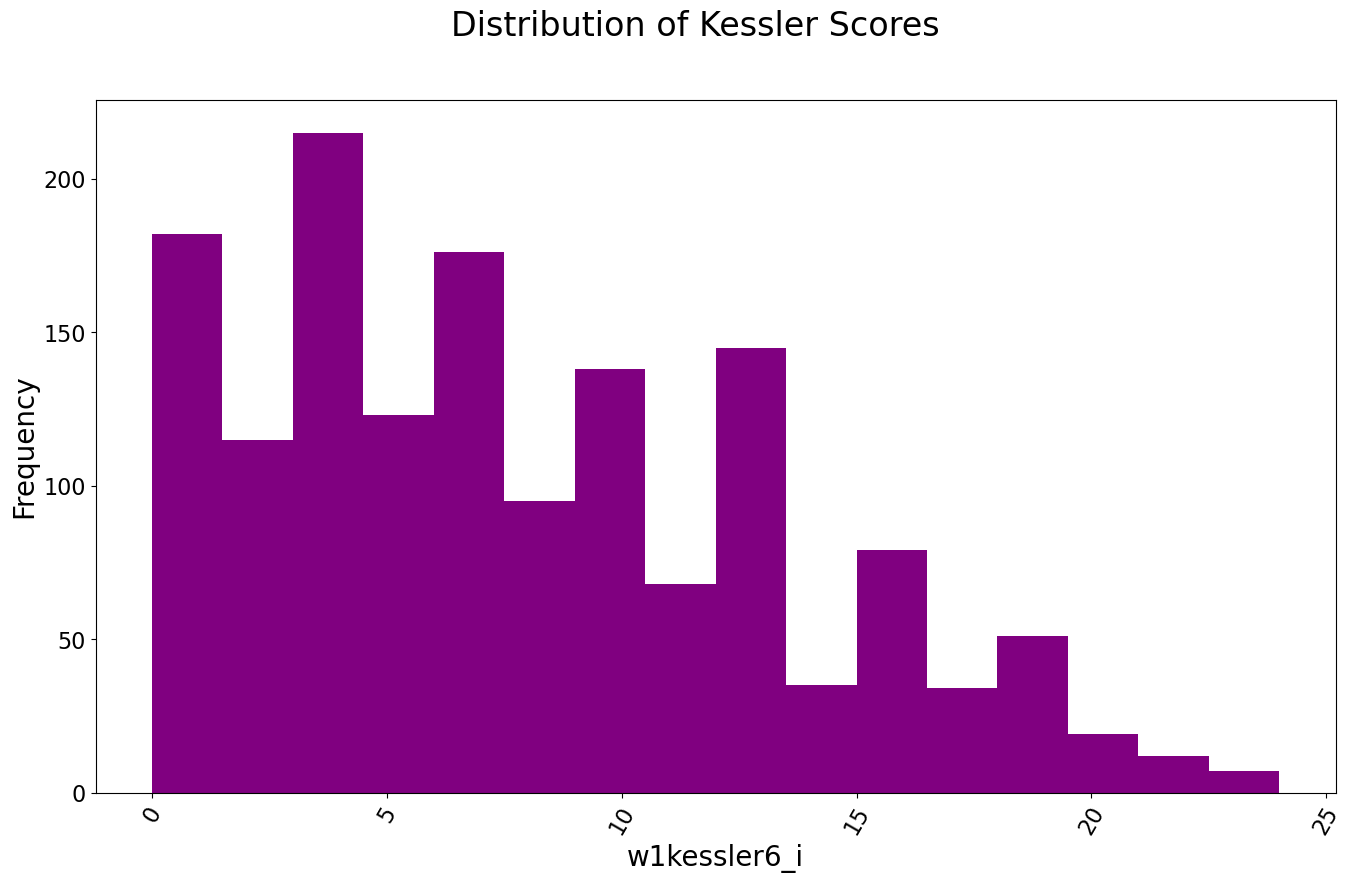

In [8]:
# Plot a histogram of it
plt.figure(figsize = (16, 9));
plt.hist(meyer['w1kessler6_i'], bins = 'auto', color = 'purple');
plt.suptitle(f'Distribution of Kessler Scores', size = 24);
plt.xlabel('w1kessler6_i', size = 20);
plt.ylabel('Frequency', size = 20);
plt.xticks(size = 16, rotation = 60);
plt.yticks(size = 16);

uh oh, looks non-normal.  

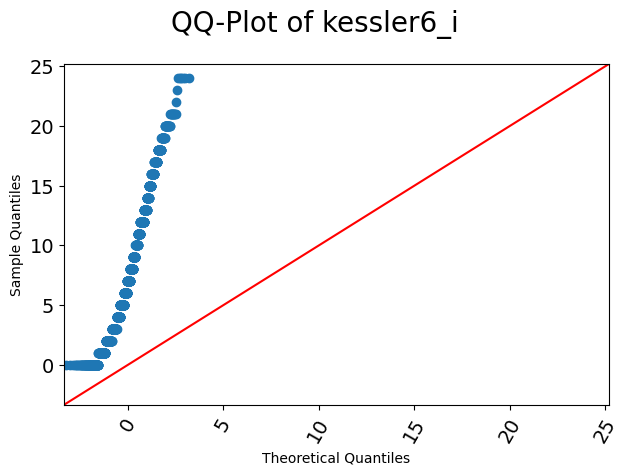

In [9]:
# QQplot of raw kessler
sm.qqplot(meyer['w1kessler6_i'], line='45');
plt.suptitle(f'QQ-Plot of kessler6_i', size = 20);
plt.xticks(size = 14, rotation = 60);
plt.yticks(size = 14);
plt.tight_layout();

let's try some transformations

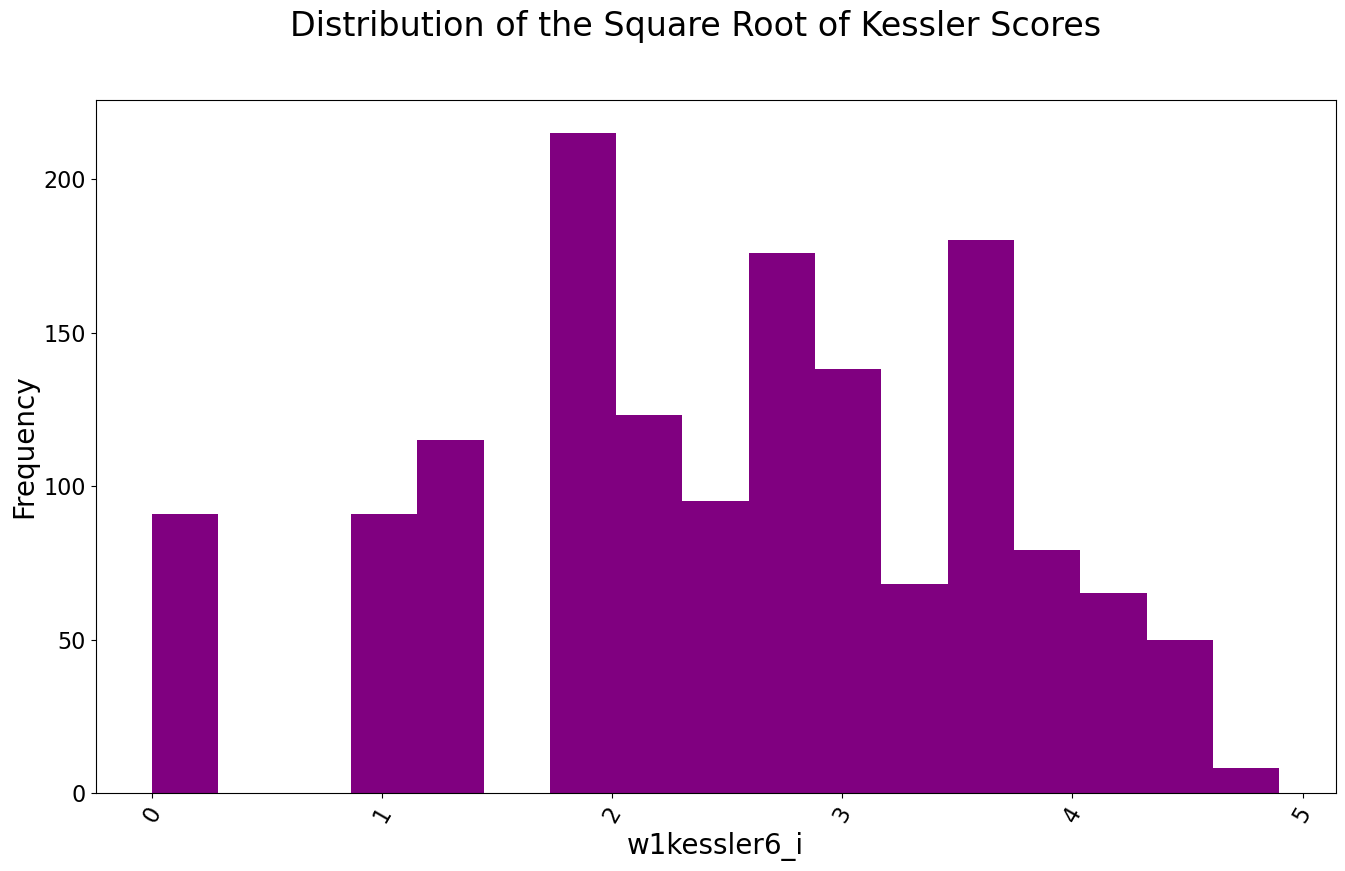

In [10]:
# Plot a histogram of the square root
plt.figure(figsize = (16, 9));
plt.hist(meyer['w1kessler6_i']**(1/2), bins = 'auto', color = 'purple');
plt.suptitle(f'Distribution of the Square Root of Kessler Scores', size = 24);
plt.xlabel('w1kessler6_i', size = 20);
plt.ylabel('Frequency', size = 20);
plt.xticks(size = 16, rotation = 60);
plt.yticks(size = 16);

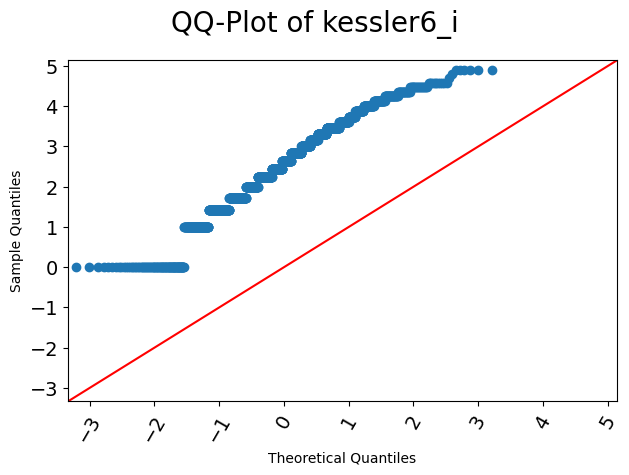

In [11]:
# QQplot of the square root
sm.qqplot((meyer['w1kessler6_i']**0.5), line='45');
plt.suptitle(f'QQ-Plot of kessler6_i', size = 20);
plt.xticks(size = 14, rotation = 60);
plt.yticks(size = 14);
plt.tight_layout();

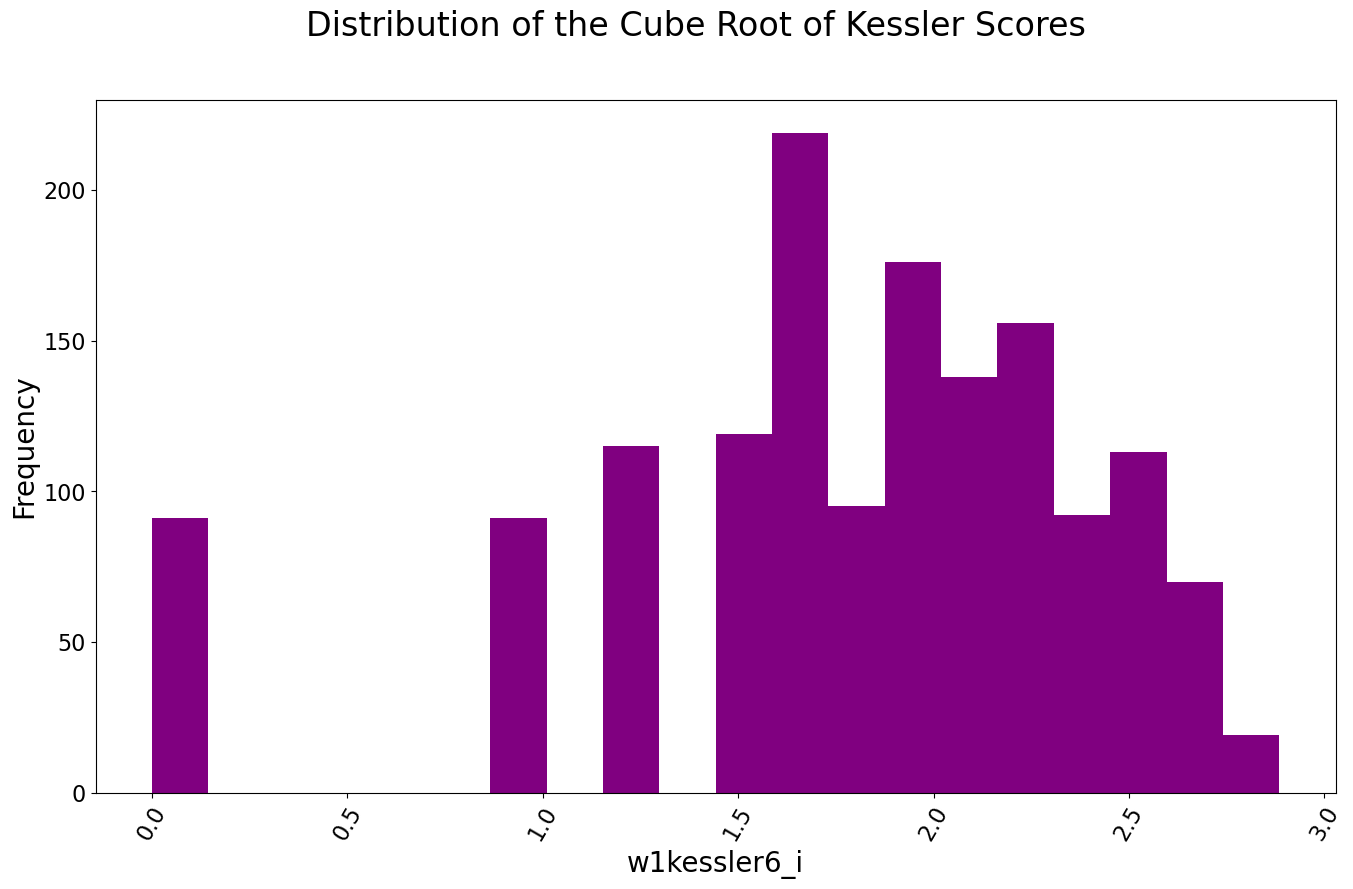

In [12]:
# Plot a histogram of the cube root
plt.figure(figsize = (16, 9));
plt.hist(meyer['w1kessler6_i']**(1/3), bins = 'auto', color = 'purple');
plt.suptitle(f'Distribution of the Cube Root of Kessler Scores', size = 24)
plt.xlabel('w1kessler6_i', size = 20);
plt.ylabel('Frequency', size = 20);
plt.xticks(size = 16, rotation = 60);
plt.yticks(size = 16);

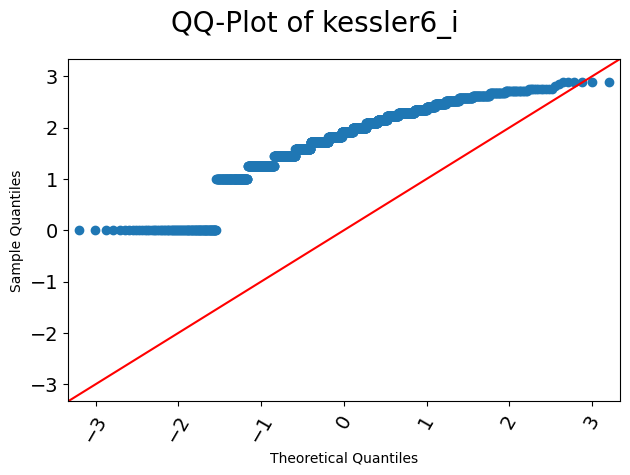

In [13]:
# QQplot of the cube root
sm.qqplot((meyer['w1kessler6_i']**(1/3)), line='45');
plt.suptitle(f'QQ-Plot of kessler6_i', size = 20);
plt.xticks(size = 14, rotation = 60);
plt.yticks(size = 14);
plt.tight_layout();

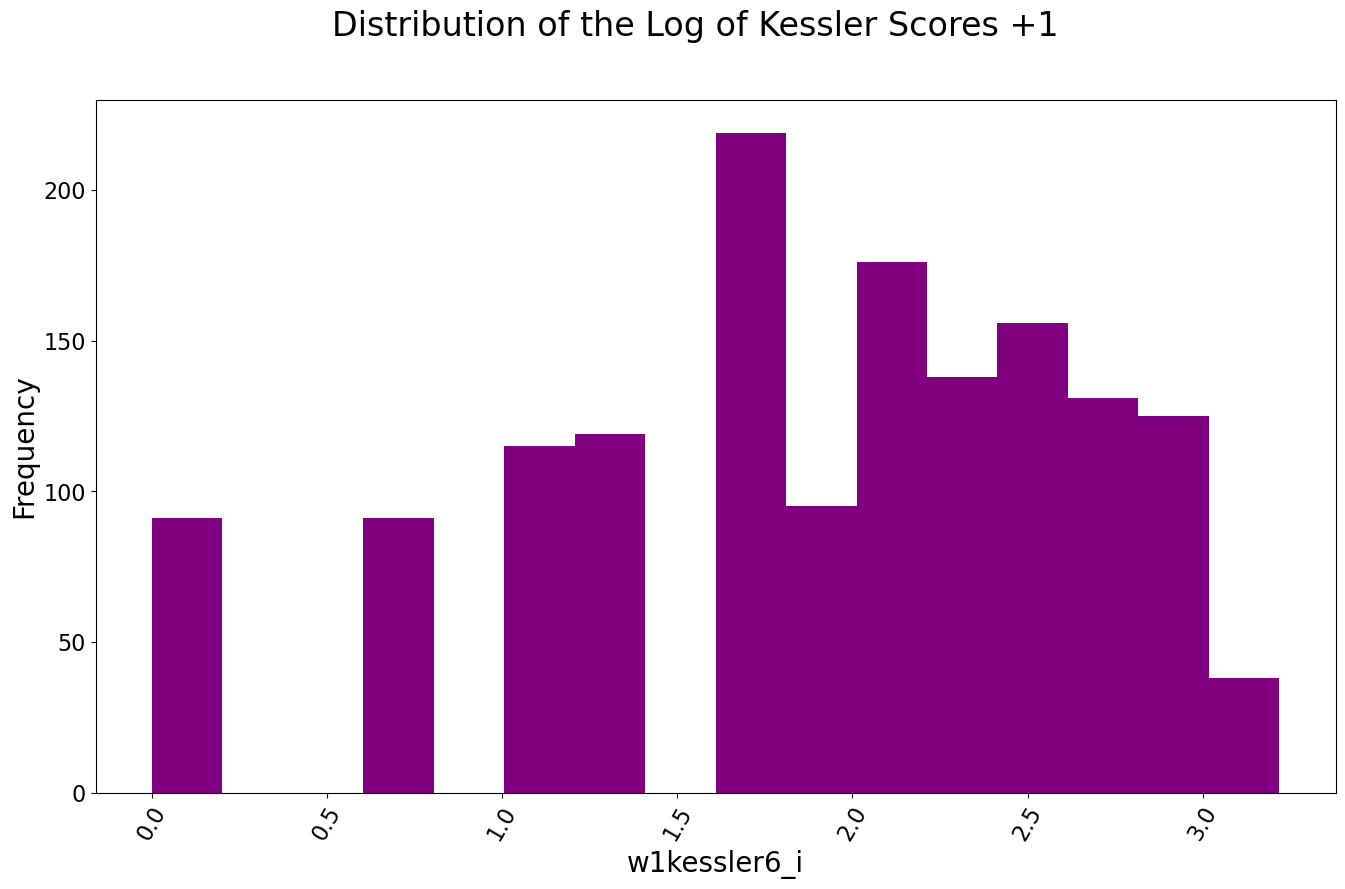

In [14]:
# Plot of a histogram of the +1 log
plt.figure(figsize = (16, 9));
plt.hist(np.log(meyer['w1kessler6_i']+1), bins = 'auto', color = 'purple');
plt.suptitle(f'Distribution of the Log of Kessler Scores +1', size = 24)
plt.xlabel('w1kessler6_i', size = 20);
plt.ylabel('Frequency', size = 20);
plt.xticks(size = 16, rotation = 60);
plt.yticks(size = 16);

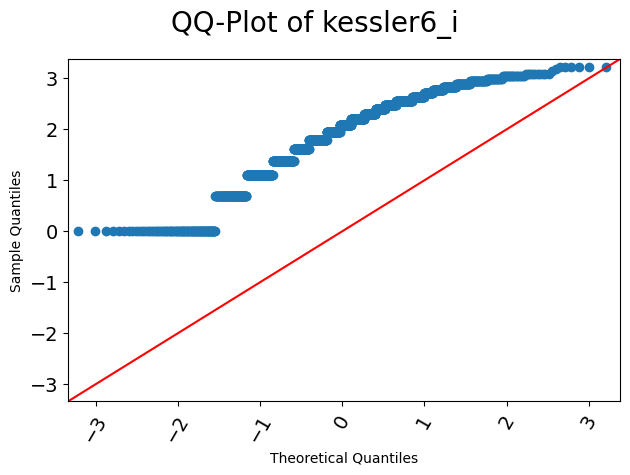

In [15]:
# QQplot of the +1 log
sm.qqplot(np.log(meyer['w1kessler6_i']+1), line='45');
plt.suptitle(f'QQ-Plot of kessler6_i', size = 20);
plt.xticks(size = 14, rotation = 60);
plt.yticks(size = 14);
plt.tight_layout();

I chose the sqrt.

In [16]:
meyer['kessler6_sqrt'] = (meyer['w1kessler6_i']**0.5)
meyer.shape

(1494, 132)

In [17]:
meyer['kessler6_sqrt'].describe()

count    1494.000000
mean        2.528508
std         1.128790
min         0.000000
25%         1.732051
50%         2.645751
75%         3.464102
max         4.898979
Name: kessler6_sqrt, dtype: float64

In [18]:
# Generate some more plots!
autoplots(meyer, 'kessler6_sqrt', transform = True, verbose = False, folder = '../03_images/image_output');

# Tell me when it's done; this function can take a minute
print("All done!")
os.listdir('../03_images/image_output') # Should show a folder with a time stamp around when the function was run

All done!


['plots_2024-06-10_h23-m00-s19',
 'plots_2024-06-10_h23-m10-s23',
 'plots_2024-06-10_h23-m12-s13']

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

### Selected Graphs

In [20]:
# Save a copy of the updated dataframe to use in the next notebook
meyer.to_csv('../02_data/df_after_eda.csv', index = False)